<a href="https://colab.research.google.com/github/jsleeg98/deeplearning_from_scratch/blob/main/ch7_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.1 전체 구조

CNN 구조에는 이전에 못보았던 합성곱 계층(Convolutional layer)와 풀링 계층이 새롭게 등장한다.

지금까지 신경망에는 인접하는 계층의 모든 뉴런과 결합되어 있었습니다. 이를 완전연결(Fully-connected)라고 하며, 완전히 연결된 계층을 Affine 계층이라는 이름으로 구현했습니다. 

Affine 계층을 사용하면 가령 층이 5개인 완전 연결 신경망은 다음과 같이 구현할 수 있다.

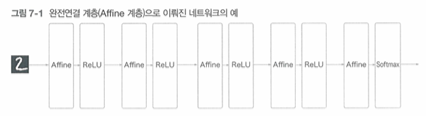

위와 다르게 CNN으로 이루어진 네트워크는 다음과 같다.

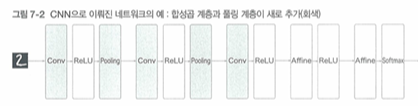

위 그림처럼 기존과 달리 새로운 합성곱 계층과 풀링 계층이 추가된다. 

따라서 CNN의 계층은 'Conv-ReLU-(Pooling)' 흐름으로 연결된다.

또한 CNN 계층에서 출력과 가까운 층에서는 지금까지의 'Affine-ReLU'구성을 사용할 수 있다. 또한 마지막 출력 계층에서는 'Affine-Softmax' 조합을 그대로 사용한다.

# 7.2 합성곱 계층

CNN에서는 패딩(Padding)과 스트라이드(Stride) 등의 CNN 고유의 용어가 등장한다.

## 7.2.1 완전연결 계층의 문제점

지금까지 본 완전연결 신경망에서는 완전연결 계층(Affine 계층)을 사용했습니다. 이는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있었습니다.

완전연결 계층의 문제점은 **데이터의 형상이 무시**된다는 것입니다. 

이미지 데이터를 예를 들면, 이미지는 통상 가로, 세로, 채널(색상)으로 이루어져 있지만 모델에 학습될 때 평탄화 과정을 거쳐 입력되기 때문에 그 위치 정보가 소실되어 버립니다. 

예를 들어 MNIST에서는 원래 1채널 가로 28, 세로 28인 데이터를 평탄화하여 784개의 데이터로 바꾸어 위치 정보를 잃었습니다.

이미지는 3차원 형상이며, 이 형상에는 소중한 공간적 정보가 담겨있습니다. 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀은 별 연관이 없는 등의 의미가 있을 수 있습니다. 하지만 완전연결 계층을 이용하면 이러한 형상을 무시하고 형상에 담긴 정보를 살릴 수 없습니다.

하지만 합성곱 계층은 형상을 유지합니다. 이미지도 3차원 데이터로 입력 받으며 마찬가지로 다음 계층에도 3차원 데이터로 전달합니다.

CNN에서는 합성곱 계층의 입력력 데이터를 특징 맵(Feature map)이라고도 합니다. 입력 데이터를 입력 특징 맵(input feature map), 출력 데이터를 출력 특징 맵(output feature map)이라고 하는 식입니다. 

## 7.2.2 합성곱 연산

합성곱 계층에서는 합성곱(convolutional) 연산을 처리합니다. 

이는 필터 연산에 해당하며 다음과 같습니다.

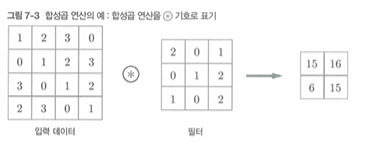

위의 예시에서 입력 데이터는 세로, 가로 방향의 형상을 가졌고, 필터 역시 세로, 가로 방향의 차원을 갖습니다.

데이터와 필터의 형상을 (높이, 너비)로 표기하며, 여기서는 입력은 (4, 4), 필터는 (3, 3), 출력은 (2, 2)가 됩니다. 
추가적으로 필터는 커널이라고도 합니다.

합성곱 연산의 순서는 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용하는 것을 말합니다. 

윈도우를 움직여가면서 대응하는 입력과 필터 값을 곱한 후 그 총합을 구하여 계산합니다.(단일 곱셈-누산(fused multipy=add)) 

다음과 같습니다.

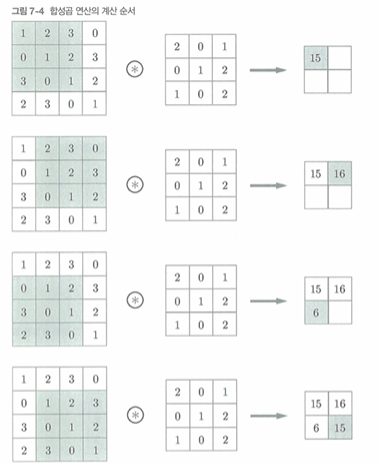

또한 CNN에도 편향이 존재하는데 이를 표현한 그림은 다음과 같습니다.

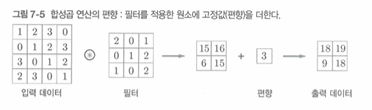

좀 더 이해하기 쉬운 애니매이션은 다음과 같습니다.

https://gruuuuu.github.io/machine-learning/cnn-doc/

## 7.2.3 패딩

합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(보통 0)으로 채우기도 합니다. 이를 패딩(padding)이라고 하며, 합성곱 연산에서 자주 이용하는 기법입니다.


다음 그림은 (4, 4) 크기의 입력데이터에 폭이 1인 패딩을 적용한 모습입니다.

폭은 임의로 설정할 수 있습니다.

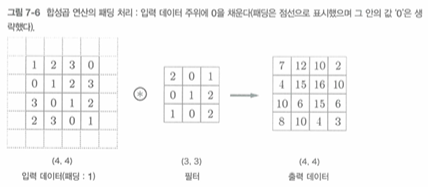

따라서 위와 같이 입력 데이터는 (4, 4)에서 (6, 6)이 되고 출력은 (4, 4)가 됩니다. 

합성곱에서 패딩을 사용하는 이유는 출력 데이터의 크기를 유지하기 위해서 입니다. 패딩을 적용하지 않으면 합성곱 계층을 지날 때마다 출력의 형상이 줄어들게 됩니다. 하지만 패딩을 적용하면 출력의 크기가 줄어들지 않게 되고 특히 패딩이 1인 경우 출력의 크기가 입력의 크기와 같아집니다.(stride가 1인 경우)

# 7.2.4 스트라이드(stride)

지금까지 본 예시는 모두 스트라이드가 1이었지만, 예를 들어 스트라이드를 2로하면 필터를 적용하는 윈도우가 두 칸씩 이동합니다.

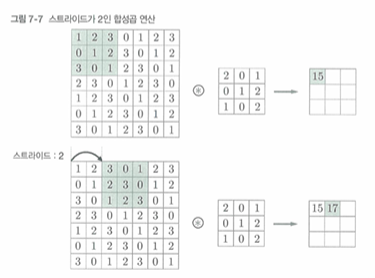

이렇게 스트라이드를 2로 하면 출력이 (3,3)이 되는 것을 확인할 수 있습니다.

이를 통해 스트라이드가 크면 출력의 크기가 작아진다는 것을 알 수 있습니다. 

다음은 패딩, 스트라이드, 출력 크기 계산하는 방법입니다.

* 입력 크기(H, W)
* 필터 크기(FH, FW)
* 출력 크기(OH, OW)
* 패딩 P
* 스트라이드 S


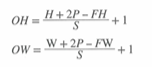

다음은 계산 예시 입니다.

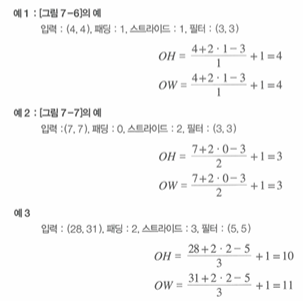

단, 위의 값이 정수로 나눠떨어지는 값이어야한다는 점에 주의해야합니다.

## 7.2.5 3차원 데이터의 합성곱 연산



지금까지는 2차원 형상을 다루는 합성곱 연산을 살펴봤습니다.

하지만 이미지는 보통 색깔 정보까지 있기 때문에 가로, 세로, 채널로 3차원 형상을 가지고 있습니다. 

다음은 3차원 형상의 합성곱 연산 예입니다. 단순히 필터도 3차원이고 입력도 3차원으로 바뀐 상태라고 생각하면 됩니다.

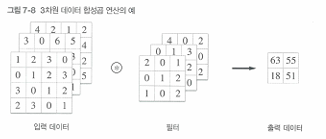

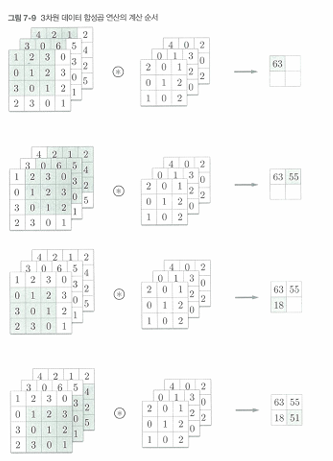

3차원 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야한다는 것입니다.

## 7.2.6 블록으로 생각하기

3차원 합성곱을 블록으로 생각할 수 있습니다.

3차원 데이터를 다차원 배열로 나타낼 때는 (채널, 높이, 너비) 순서로 (C, H, W)라고 씁니다.

필터도 마찬가지로 (채널, 필터 높이, 필터 너비)로 (C, FH, FW)로 씁니다.

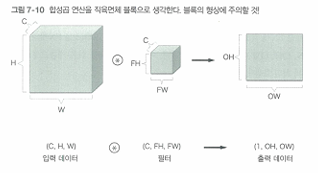

위 그림에서 출력 데이터는 한장의 특징맵(feature map)입니다. 또한 합성곱 연산의 출력으로 다수의 채널을 내보내려면 필터를 여러개 사용하는 것입니다.

그 그림은 다음과 같습니다.

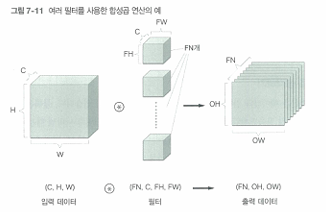

따라서 위 그림에서 필터의 형상은 4차원이며 (출력 채널 수, 입력 채널 수, 높이, 너비)로 예를 들어 채널 수 3, 크기 5x5인 필터 20개가 있다면 (20, 3, 5, 5)로 표현할 수 있습니다.

합성곱 연산에서도 편향(bias)가 쓰입니다. 편향은 출력 특징 맵의 한 채널당 하나의 bias를 가지며 따라서 항상 (출력 채널 수, 1, 1)의 형상을 가집니다. 

다음 그림과 같습니다.

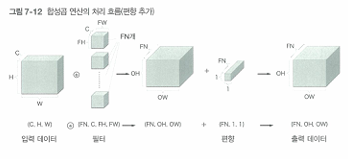

위 편향의 값은 필터의 출력인 (FN, OH, OW) 블록의 대응 채널의 원소 모둥 더해집니다. 이 때 형상이 다른 블록이기 때문에 브로드캐스트 기능으로 쉽게 구현됩니다.

## 7.2.7 배치 처리

미니 배치 방식은 입력 데이터를 한 덩어리로 묶어 처리하는 방식으로 처리 효율을 높일 수 있는 방식입니다.

합성곱 연산에서의 배치 처리는 데이터를 (데이터 수, 채널 수, 높이, 너비)순으로 저장하여 처리하는 방식 입니다.

그 그림은 다음과 같습니다.

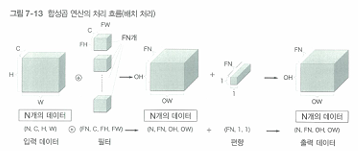

위와 같이 배치 처리를 하면 N회분의 처리를 한번에 할 수 있다는 장점이 있습니다.

# 7.3 풀링 계층

풀링은 세로, 가로 방향의 공간을 줄이는 연산입니다. 

다음 그림과 같이 2x2 영역을 원소 하나로 집약하여 공간의 크기를 줄입니다.

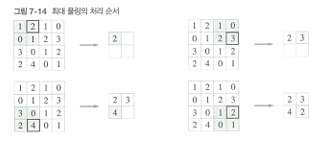

위 그림은 2x2 최대 풀링(max pooling)을 스트라이드 2로 처리하는 순서 입니다. 

참고로 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통입니다. 예를 들어 윈도우가 3x3 이면 스트라이드는 3, 윈도우가 4x4이면 스트라이드는 4로 설정합니다.

## 7.3.1 풀링 계층의 특징

1. 학습해야할 매개변수가 없다.

  합성곱 연산이나 완전 연결 연산과 같은 경우에는 가중치와 편향과 같이 학습할 매개변수가 있었습니다. 하지만 풀링 계층은 해당 영역에서 최댓값이나 평균을 취하는 처리로 이것들이 필요하지 않습니다.

2. 채널 수가 변하기 않는다. 

  풀링 연산은 입력 데이터 채널 수 그대로 출력 데이터를 내보냅니다. 다음 그림처럼 채널마다 독립적으로 계산하기 때문입니다.

  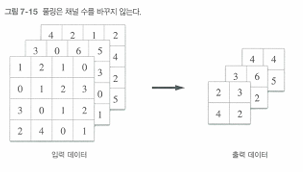

3. 입력의 변화에 영향을 적게 받는다.(강건하다)(robust하다)

  다음 그림과 같이 입력데이터가 조금 변해도 풀링의 결과가 잘 변하지 않는 것을 알 수 있습니다.

  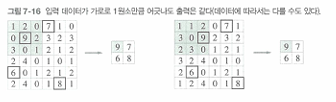

# 7.4 합성곱/풀링 계층 구현하기

합성곱 계층과 풀링 계층은 복잡해보이지만, 사실 '트릭'을 사용하면 쉽게 구현할 수 있습니다.


## 7.4.1 4차원 배열

앞에서 설명한 대로 배치 처리를 하게 되면 CNN에서 계층 사이에 흐르는 데이터는 4차원 데이터 입니다. 예를 들어 데이터 형상이 (10, 1, 28, 28)이라면 높이 28, 너비 28, 채널 1개인 데이터가 10개 있다는 이야기입니다. 

In [ ]:
import numpy as np

x = np.random.rand(10, 1, 28, 28)
print(x.shape)

(10, 1, 28, 28)


여기서 10개의 데이터 중에서 첫번째 데이터에 접근하려면 다음과 같이 씁니다.

In [ ]:
# print(x[0])
print(x[0].shape)

(1, 28, 28)


첫번째 데이터의 첫 채널의 공간 데이터에 접근 하려면 다음과 같습니다.

In [ ]:
# 둘다 같습니다.
print(x[0][0])
print(x[0, 0])
print(x[0][0] == x[0, 0])

[[0.02164479 0.5198136  0.60513484 0.30517136 0.9723277  0.59971597
  0.64614187 0.74076632 0.27556997 0.90919913 0.53793054 0.92744637
  0.63051214 0.62912674 0.13383715 0.33720808 0.17216591 0.66723293
  0.61351865 0.76258387 0.25763855 0.36991399 0.16801661 0.55339888
  0.47256746 0.75564583 0.64578877 0.0399185 ]
 [0.32593859 0.87147228 0.75773643 0.6391781  0.06608811 0.74290226
  0.11629554 0.09387162 0.59394255 0.4979612  0.44038848 0.72900566
  0.8956484  0.78352145 0.45568421 0.27265116 0.44061399 0.92288149
  0.53733793 0.0672247  0.16032841 0.58639908 0.26299847 0.23949647
  0.59012704 0.69651519 0.90547534 0.31511884]
 [0.72924663 0.40437346 0.86510966 0.44478169 0.07721459 0.75183304
  0.19342676 0.88372446 0.68086972 0.93898198 0.05053425 0.0870753
  0.39098552 0.77689627 0.84776195 0.22627237 0.3399916  0.48394697
  0.85353591 0.76884839 0.59910108 0.03324759 0.91749863 0.87211998
  0.41342968 0.47185552 0.73685659 0.58816336]
 [0.95884185 0.13757899 0.90486112 0.5965800

## 7.4.2 im2col로 데이터 전개하기

합성곱 연산을 곧이곧대로 구현하려면 for 문을 겹겹이 써야겠죠. 이는 귀찮고 numpy에 최적화되지 않은 방법입니다. 

im2col은 입력 데이터를 가중치 계산 시 좋게 전개하는 함수 입니다. 

다음 그림과 같이 필터를 적용하는 영역을 한 줄로 늘어 놓는 것을 말합니다.

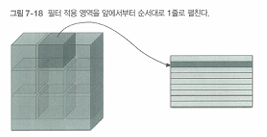

위 그림은 스트라이드를 크게 하여 필터의 적용 영역이 겹치지 않게 하였지만 보통은 겹치는 경우가 대부분입니다.

필터 적용 영역이 겹치면 원소수가 원래 블록의 원소 수보다 많아져 메모리를 더 많이 소비하는 단점이 있습니다. 

하지만 컴퓨터는 큰 행렬을 묶어서 계산하는 데 탁월합니다. 또한 numpy와 같은 선형 대수 라이브러리는 이것에 최적화 되어 있기 때문에 이 방식이 효율적이라고 할 수 있습니다.

다음 그림은 im2col방식으로 합성곱 연산을 처리한 그림입니다.

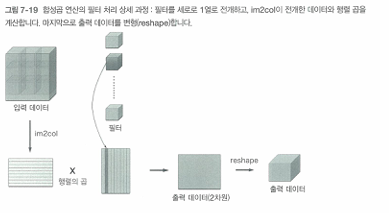

## 7.4.3 합성곱 계층 구현하기

이 책에서는 im2col 함수를 미리 만들어 제공합니다. 이는 간단한 함수 10개 정도를 묶은 것입니다.

im2col 함수의 인터페이스는 다음과 같습니다.

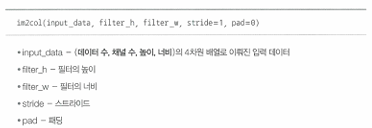

In [ ]:
! git clone https://github.com/WegraLee/deep-learning-from-scratch.git
! mv ./deep-learning-from-scratch/common ./

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 22.18 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [ ]:
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)


(9, 75)
(90, 75)


위 결과를 보면 데이터가 1개일 때는 9, 75의 형상을 가지는 것을 알 수 있습니다. 이는 75는 3x5x5인 필터의 크기와 같고, 9는 ((7-5)+1) * ((7-5)+1) = (OH * OW) 와 같다고 할 수 있습니다. 

데이터 개수가 10개면 그 10배가 됩니다.

im2col을 사용하여 합성곱 계층을 구현하면 다음과 같습니다.


In [ ]:
class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad
  
  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape
    out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
    out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T # 필터 전개
    out = np.dot(col, col_W) + self.b

    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    return out
    

합성곱 계층은 필터(가중치), 편향, 스트라이드, 패딩을 인수로 받아 초기화합니다.

필터는 (FN, C, FH, FW)의 4차원 형상입니다. 여기서 FN은 필터의 개수, C는 채널, FH는 필터 높이, FW는 필터 너비입니다.

reshape의 두 번째 인수를 -1로 지정했는데 이는 reshape에서 제공하는 편의기능으로 -1을 지정하면 다차원 배열의 원소수가 변환 후에도 똑같이 유지되도록 적절히 묶어주는 것입니다. 

예를 들어 (10, 3, 5, 5) 형상에서 원소수는 총 750입니다. 여기서 reshape(10, -1)을 호출하면 750개의 원소를 10 묶음으로 즉 (10, 75)로 자동으로 만들어줍니다.

이를 활용하여 forward 구현의 마지막에 출력 데이터를 적절한 형상으로 바꿔줍니다. 이때 transpose 함수를 사용하는데 이는 다차원 배열의 축 순서를 바꿔주는 함수 입니다. 이는 다음 그림과 같습니다.

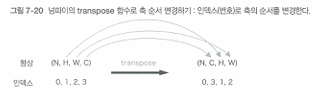

합성곱의 역전파를 구현할 때에는 im2col을 역으로 처리해야합니다. 이 책에서 제공하는 col2im 함수를 사용하면 됩니다. 

## 7.4.4 풀링 계층 구현하기

풀링 계층 구현도 im2col을 활용하여 입력 데이터를 전개합니다. 이 때 풀링의 경우엔 채널 쪽이 독립적이라는 점이 합성곱 계층과 다릅니다. 그 그림은 다음과 같습니다.

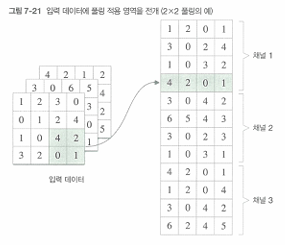

이후 적절하게 형상을 바꿔주면(reshape)하면 됩니다.

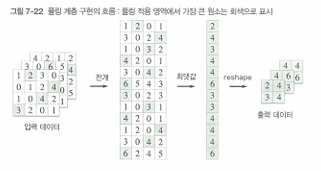

In [ ]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    # 전개 1
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h*self.pool_w)

    # 최댓값
    out = np.max(col, axis = 1) # axis=1이면 입력 col의 첫번째 차원의 축마다 최댓값 구함

    # 성형
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    return out

풀링 계층의 역전파는 ReLU 계층을 구현할 떄 사용한 max의 역전파를 참고하면 됩니다.(5.5.1) 

# 7.5 CNN 구현하기

CNN의 구조는 다음 그림과 같습니다.

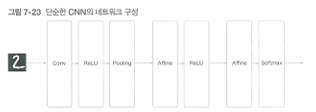

위 그림의 네트워크는 conv-ReLU-Pooling-Affine-ReLU-Affine-softmax 순으로 흐릅니다. 이를 SimpleConvNet 이름의 클래스로 구현하겠습니다.

SimpleConvNet 클래스 초기화 시 받는 인수

* input_dim - 입력 데이터(채널 수, 높이, 너비)의 차원
* conv_param - 합성곱 계층의 하이퍼파라미터(딕셔너리), 딕셔너리의 키는 다음과 같다.
  - filter_num - 필터 수
  - filter_size - 필터 크기
  - stride - 스트라이드
  - pad - 패딩
* hidden_size - 은닉층(완전연결)의 뉴런 수
* output_size - 출력층(완전연결)의 뉴런 수
* weight_init_std - 초기화 때의 가중치 표준편차

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [ ]:
! mv ./deep-learning-from-scratch/dataset ./
! mv ./deep-learning-from-scratch/ch07/simple_convnet.py ./

train loss:2.29958652249499
=== epoch:1, train acc:0.354, test acc:0.336 ===
train loss:2.297446956969608
train loss:2.2922670275124766
train loss:2.28842835296589
train loss:2.281135017610306
train loss:2.2697532608226636
train loss:2.252227523360441
train loss:2.230529346450895
train loss:2.219559714156651
train loss:2.185041727047878
train loss:2.1426790053853075
train loss:2.1258668488940127
train loss:2.1187999983165975
train loss:2.012458079908302
train loss:1.964571019710683
train loss:1.9168502553079814
train loss:1.8202840006457692
train loss:1.8338795328932371
train loss:1.681774071598011
train loss:1.7312088364006206
train loss:1.5695927802823197
train loss:1.5134159716079423
train loss:1.428506525266625
train loss:1.260201983956676
train loss:1.223952062964293
train loss:1.152382121140196
train loss:1.1034537115773657
train loss:1.0170553268607725
train loss:0.8852713814437547
train loss:0.937908872139119
train loss:0.9796580105580669
train loss:1.0044049512893582
train los

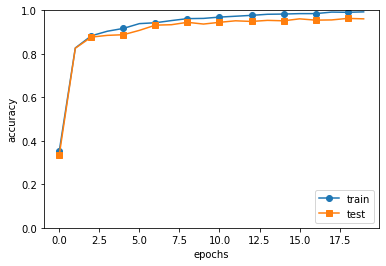

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, one_hot_label=True)


# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 7.6 CNN 시각화하기

합성곱 계층을 시각화하여 CNN에 보고 있는 것이 무엇인지 알아보도록 하겠습니다.

## 7.6.1 1번째 층의 가중치 시각화하기

MNIST 데이터셋으로 간단한 CNN학습을 진행해보았는데 이 때 1번째 층의 합성곱 계층의 가중치는 그 형상이 (30, 1, 5, 5)였습니다. (필터 30개, 채널 1개, 5x5 크기), 필터의 크기가 5x4이고 채널이 1개라느 것은 이 필터를 1채널의 회색조 이미지로 시각화 할 수 있다는 뜻입니다. 이를 나타내면 다음과 같습니다.

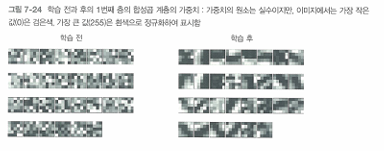

In [ ]:
! mv ./deep-learning-from-scratch/ch07/params.pkl ./

mv: cannot stat './deep-learning-from-scratch/ch07/params.pkl': No such file or directory


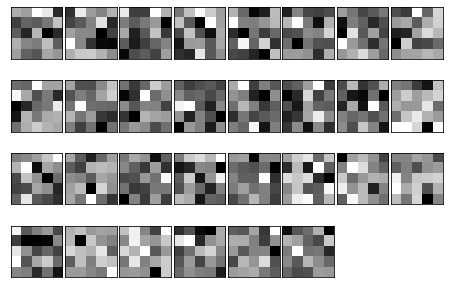

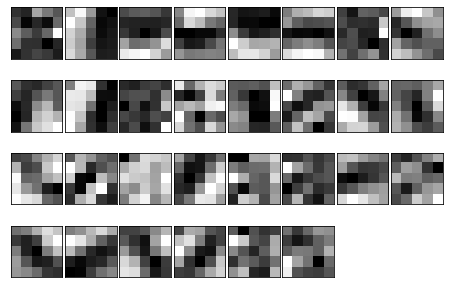

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

다음 그림을 보면 학습을 마친 필터는 규칙성있는 이미지가 되었습니다. 이는 엣지(색상이 바뀐 경계선)와 블롭(국소적으로 덩어리진 영역) 등을 보고 있습니다. 

가령 왼쪽 절반이 흰색이고 오른쪽 절반이 검은색인 피러는 세로방향의 엣지에 반응하는 필터입니다.

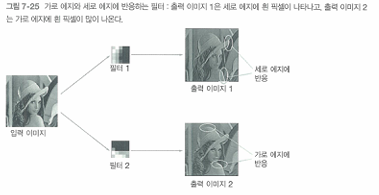

## 7.6.2 층 깊이에 따른 추출 정보 변화

딥러닝 시각화에 과한 연구에 따르면 계층이 깊어질수록 추출되는 정보(정확히는 강하게 반응하는 뉴런)는 더 추상화된다는 것을 알 수 있습니다.

다음 그림을 살펴보면 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급'정보로 변화해간다는 것을 알 수 있습니다.

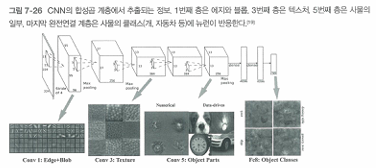

# 7.7 대표적인 CNN

이 절에서는 CNN의 원조인 LeNet과 딥러닝이 주목받도록 이끈 AlexNet을 소개합니다.

## 7.7.1 LeNet

LeNet은 손글씨 숫자를 인식하는 네트워크로 1998년에 제안되었습니다. 그림과 같이 합성곱 계층과 풀링 계층을 반복하고 마지막으로 완전 연결 계층을 거치면서 결과를 출력합니다.

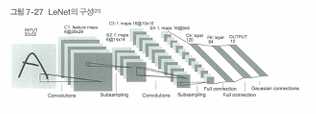

LeNet과 현재의 CNN을 비교하면 몇가지 차이가 존재합니다.

1. 활성활 함수
  - LeNet은 시그모이드 함수를 사용하는 데 반해, 현재는 주로 ReLU를 사용합니다.

2. 차원 감소
  - LeNet은 서브샘플링을 하여 중간 데이터 크기가 작아지지만, 현재는 최대 풀링(max pooling)을 활용합니다.
  

## 7.7.2 AlexNet

LeNet과 비교해 훨씬 최근인 2012년에 발표된 AlexNet은 딥러닝 열풍을 일으키는 큰 역할을 했습니다. 구조는 다음과 같습니다.

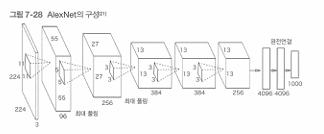

AlexNet은 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거처 결과를 출력합니다. 

LeNet과 차이점은 다음과 같습니다.
* 활성화 함수로 ReLU를 사용하였다.
* LRN(Local Response Normalization)이라는 국소적 정규화를 실시하는 계층을 이용한다.
* 드롭아웃을 사용한다.


이처럼 네트워크 구성 면에서는 LeNet이나 AlexNet에 큰 차이가 없습니다. 그러나 이를 둘러싼 환경과 컴퓨팅 기술이 큰 진보를 이룬 것입니다. 대량의 데이터를 누구나 얻을 수 있게 되었고, 병렬 계산에 특화도니 GPU가 보급되면서 대량의 연산을 고속으로 수행할 수 있게 되었습니다. 

빅데이터와 GPU, 이것이 딥러닝 발전의 큰 원동력입니다.

# 7.8 정리

* CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
* 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
* CNN을 시각화해보면 계층이 깊어질수록 고급정보가 추출되는 모습을 확인할 수 있다.
* 대표적인 CNN에는 LeNet과 AlexNet이 있다.
* 딥러닝 발전에는 빅데이터와 GPU가 크게 기여했다.